Ans 19

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


In [4]:
def imshow(title=" ", image=None, size=8):
    if image is None:
        return
    if len(image.shape) == 3:
        display_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    else:
        display_image = image

    w, h = image.shape[0], image.shape[1]
    aspect_ratio = w / h
    plt.figure(figsize=(size * aspect_ratio, size))
    cmap_setting = 'gray' if len(image.shape) == 2 else None
    plt.imshow(display_image, cmap=cmap_setting)
    plt.title(title)
    plt.axis("off")
    plt.show()


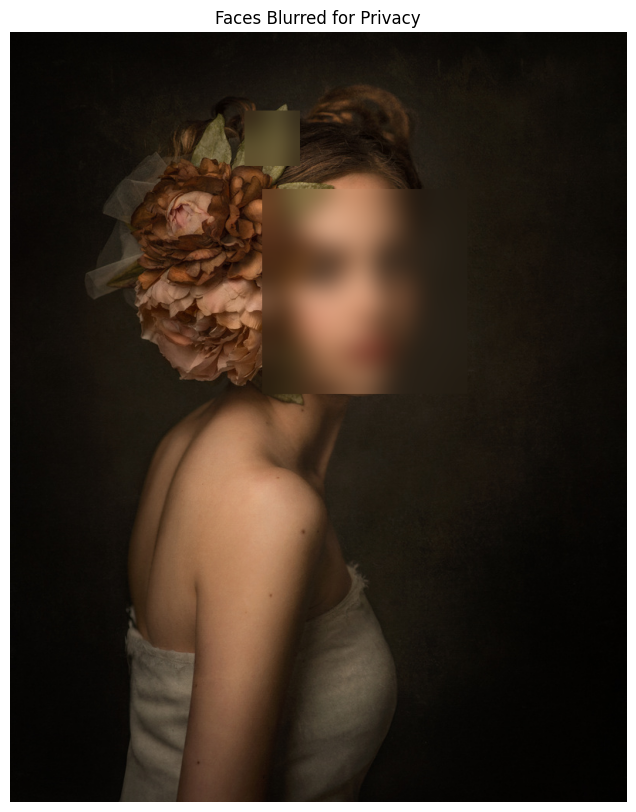

In [5]:
# face cascade classifier
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Limage
image_path = r'C:\hg3\New folder\6.jpg' 
img = cv2.imread(image_path)

if img is None:
    print("Error: Could not load image. Check the file path.")
    exit()

# grayscale 
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Detect faces
faces = face_cascade.detectMultiScale(
    gray,
    scaleFactor=1.1,
    minNeighbors=5,
    minSize=(30, 30)
)

for (x, y, w, h) in faces:
    face_roi = img[y:y+h, x:x+w]
    blurred_face = cv2.GaussianBlur(face_roi, (99, 99), 0)
    img[y:y+h, x:x+w] = blurred_face
imshow(title="Faces Blurred for Privacy", image=img, size=10)